<a href="https://colab.research.google.com/github/maryamarief96/CE888/blob/master/DS_74_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv", delimiter = ",",names=['f1', 'f2', 'f3', 'class']
)

In [0]:
df.head(30)

In [0]:
df['class'].value_counts()

1    225
2     81
Name: class, dtype: int64

In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
f1       306 non-null int64
f2       306 non-null int64
f3       306 non-null int64
class    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


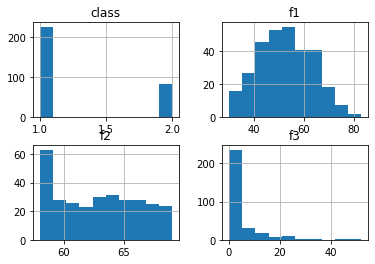

In [0]:
df.hist()
plt.show()

In [0]:
print(df.iloc[:,-1].value_counts())
print("*"*50)
print(df.iloc[:,-1].value_counts(normalize = True))

1    225
2     81
Name: class, dtype: int64
**************************************************
1    0.735294
2    0.264706
Name: class, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


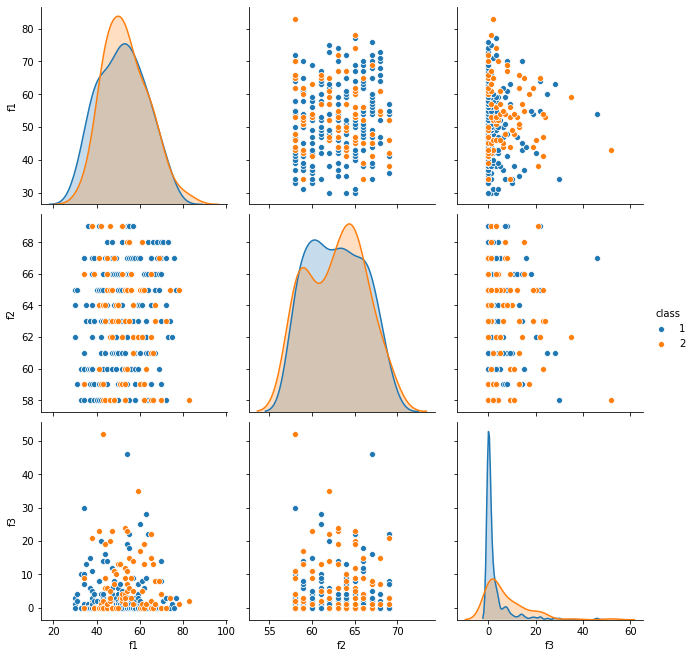

In [0]:
sns.pairplot(df,hue='class',kind='scatter',size=3)

In [0]:
features=['f1','f2','f3']
outcomes_of_interest=['class']

In [0]:
X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_df, y_df, random_state=0, stratify=y_df, shuffle=True)

In [0]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


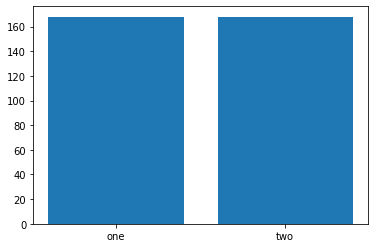

In [0]:
one=np.count_nonzero(y_train_res == 1)

two=np.count_nonzero(y_train_res == 2)

height=[one,two]
bars=['one','two']
y_pos = np.arange(len(bars))


plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [0]:
X = StandardScaler().fit_transform(X)